# Predict Continent and Language

In this project, we’ll use decision trees to predict the continent a country is located on, and its language based on features of its flag and other country's properties. For instance, some colors are good indicators as well as the presence or absence of certain shapes could give one a hint. We’ll explore which features are the best to use and will create several decision trees to compare their results. The [**Flags Data Set**](https://archive.ics.uci.edu/ml/datasets/Flags) used in this project is provided by UCI’s Machine Learning Repository.

Attribute Information:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

## Data Investigation

1.Let’s start with necessary imports and uploading data from `flags.csv` to the variable `flags`.

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Imports for ml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Imports for visualisationin
import matplotlib.pyplot as plt
import seaborn as sns

# Imports related to evaluation
from sklearn.metrics import classification_report

In [2]:
flags = pd.read_csv('flags.csv')
pd.set_option('display.max_columns', None)

flags

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Mainhue,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,red,0,0,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,1,0,1,1,1,0,0,red,0,0,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,1,1,0,1,0,0,1,green,1,0,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,1,1,0,0,0,1,1,green,0,0,0,0,0,0,0,0,1,0,green,brown


In [3]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [4]:
flags.isna().sum()

Name          0
Landmass      0
Zone          0
Area          0
Population    0
Language      0
Religion      0
Bars          0
Stripes       0
Colors        0
Red           0
Green         0
Blue          0
Gold          0
White         0
Black         0
Orange        0
Mainhue       0
Circles       0
Crosses       0
Saltires      0
Quarters      0
Sunstars      0
Crescent      0
Triangle      0
Icon          0
Animate       0
Text          0
Topleft       0
Botright      0
dtype: int64

Result: All values seems to be present. It's not unusual, considering dataset already has been cleaned and structured. 

In [5]:
flags.dtypes

Name          object
Landmass       int64
Zone           int64
Area           int64
Population     int64
Language       int64
Religion       int64
Bars           int64
Stripes        int64
Colors         int64
Red            int64
Green          int64
Blue           int64
Gold           int64
White          int64
Black          int64
Orange         int64
Mainhue       object
Circles        int64
Crosses        int64
Saltires       int64
Quarters       int64
Sunstars       int64
Crescent       int64
Triangle       int64
Icon           int64
Animate        int64
Text           int64
Topleft       object
Botright      object
dtype: object

Result: there are only 4 columns with non-numeric data types, but we won't be converting them to some sort of numerical format, because there could be some inherent structure issues that will be hard to address within such project.

In [6]:
flags.describe()

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,0.500334,0.501187,0.500334,0.432631,0.444085,0.341556,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Values in columns look good at the first glance, so let's proceed to selection of features and labels.

## Creating Features and Labels

Let's start with the first part of the goal: the prediction of the country's continent. For this matter, the `Landmass` column seems like an obvious variant for labels within this set.

In [7]:
labels1 = flags[['Landmass']]
labels1.head()

,Landmass
0,5
1,3
2,4
3,6
4,3


For prediction of country's language we'll require `Language` column as labels. 

In [8]:
labels2 = flags[['Language']]
labels2.head()

,Language
0,10
1,6
2,8
3,1
4,6


We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels. Let's start with the columns that contain some descriptive statistics about the flags e.g. how many colors are present on a given flag, what are they, what symbols are depicted etc. We'll create two models: one that predicts the continent the country is on, another - country's language. We'll also measure the accuracy score of each model. After that we'll try different approaches to feature selection and see if that somehow inproves our results with this type of algorithm.  

In [9]:
data_flag_props = flags[['Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate','Text']]

Now let’s split theses dataframes into a training set and test set.

In [10]:
train_data1, test_data1, train_labels1, test_labels1 = train_test_split(data_flag_props, labels1, random_state = 2)
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(data_flag_props, labels2, random_state = 5)

In [11]:
train_labels1.Landmass.value_counts()

4    38
5    32
3    28
1    23
2    13
6    11
Name: Landmass, dtype: int64

In [12]:
train_labels2.Language.value_counts()

10    35
1     31
6     20
8     16
3     15
2     14
4      5
7      4
9      4
5      1
Name: Language, dtype: int64

## Making and Testing Model

We will try to fit our model on the current training data and labels and get an accuracy score based on test data and labels. They should be at least better than random guessing of 6 continents, which would give us right answers about 16% of the time.

In [13]:
# Instantiate model
tree_classifier = DecisionTreeClassifier(random_state = 2)
# Train model
tree_classifier.fit(train_data1, train_labels1) 
# Find accuracy score
print('Accuracy:', round(tree_classifier.score(test_data1, test_labels1), 2) * 100, '%')

Accuracy: 31.0 %


Now we have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better. 

## Tuning the Model

Decision Tree Model has a couple of good parameters that help to improve model's accuracy these are `max_depth` and `max_leaf_nodes`. By default, both of them equals to `None` meaning unlimited. For `max_depth` it means that nodes are expanded until all leaves are pure and  `max_leaf_nodes` in this situation will be "myriad", what can lead to overfitting on training data and bad prediction when working with real world data. Our current model's `max_depth` is:

In [14]:
tree_classifier.tree_.max_depth

14

which is way too much, and final number of leaves is:

In [15]:
tree_classifier.tree_.n_leaves

79

what is also more than we need. Let's find what optimal values would be for `max_depth` and `max_leaf_nodes` within our current classifier. 

In [16]:
# Train and test classifier, get best model params
def best_tree(train_data, train_labels, test_data, test_labels): 
    scores = []
    best_depth= 0
    best_score = 0
    best_leaf_nodes = 0
    best_classifier = None
    for current_depth in range(1,21):
        for current_leaf_nodes in range(6,101):
            current_classifier = DecisionTreeClassifier(random_state = 2, max_depth = current_depth, max_leaf_nodes = current_leaf_nodes)
            current_classifier.fit(train_data, train_labels) 
            current_score = current_classifier.score(test_data, test_labels)
            if not (current_score, current_classifier.tree_.max_depth) in scores:
                scores.append((current_score, current_classifier.tree_.max_depth))
            if best_score < current_score:
                best_score = current_score
                best_depth = current_depth 
                best_classifier = current_classifier
                best_leaf_nodes = current_leaf_nodes
    return best_classifier, scores, best_score, best_depth, best_leaf_nodes

In [17]:
tree_classifier1, scores1, best_score1, best_depth1, best_leaf_nodes1 = best_tree(train_data1, train_labels1, test_data1, test_labels1)
print('Accuracy:', round(best_score1, 2) * 100, '%')
print('Depth:', best_depth1)
print('Maximum leaf nodes:', best_leaf_nodes1)

Accuracy: 47.0 %
Depth: 6
Maximum leaf nodes: 22


Rather than printing the score of each tree that was created during enumeration process, let’s graph it. We want the x-axis to show the depth of the tree and the y-axis to show the unique tree’s scores that were calculated.

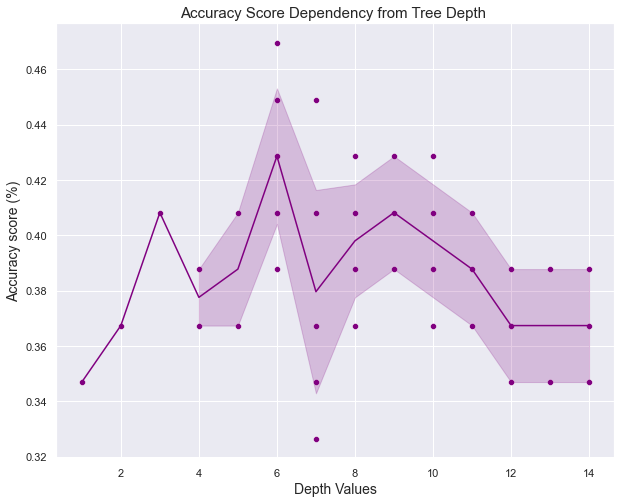

In [18]:
def depth_change(scores, color):
    # Prepare figure
    plt.figure(figsize = (10,8))
    sns.set(style='darkgrid')

    # Draw plot
    ax1=sns.scatterplot(x=scores[:,1], y=scores[:,0], color=color)
    ax2=sns.lineplot(x=scores[:,1], y=scores[:,0], color=color)

    # Add descriptions
    plt.xlabel('Depth Values', fontsize=14)
    plt.ylabel('Accuracy score (%)', fontsize=14)
    plt.title('Accuracy Score Dependency from Tree Depth ', fontsize=15)

    return plt.show()

depth_change(np.array(scores1), color='purple')

Result: there were many versions of depth, but no more than `14` and only one value of depth `6`, that has the highest score of `47%`. 

What about other metrics: precision, recall and F1-score? Let's see which continents are more predictable than others.

In [19]:
print(classification_report(test_labels1, tree_classifier1.predict(test_data1)))

              precision    recall  f1-score   support

           1       0.56      0.62      0.59         8
           2       0.00      0.00      0.00         4
           3       0.50      0.86      0.63         7
           4       0.67      0.71      0.69        14
           5       0.00      0.00      0.00         7
           6       1.00      0.22      0.36         9

    accuracy                           0.47        49
   macro avg       0.45      0.40      0.38        49
weighted avg       0.54      0.47      0.45        49



Result: a couple of continents with labels `2=S.America` and `5=Asia` are not predicted by `tree_classifier1` at all, and label `6=Oceania` had a low recall (the ratio of correctly guessed positives to actually positive ones) which can be a sign that there were not enough data containing these labels, but there could also be some other factor at play, considering that label `5` has `32` data points, though existing numbers of labels in training sets are low for creating high reliability classifiers anyway.  

Now let's check feature importance within our current `tree_classifier1`.

In [20]:
sorted(zip(tree_classifier1.feature_importances_, tree_classifier1.feature_names_in_))

[(0.0, 'Bars'),
 (0.0, 'Blue'),
 (0.0, 'Gold'),
 (0.0, 'Icon'),
 (0.0, 'Orange'),
 (0.0, 'Quarters'),
 (0.0, 'Saltires'),
 (0.0, 'Triangle'),
 (0.034780641313937044, 'Text'),
 (0.043248054128992554, 'Crescent'),
 (0.04417969557377475, 'Circles'),
 (0.047853745858604156, 'Red'),
 (0.04839631051357239, 'Crosses'),
 (0.060507274412817454, 'Colors'),
 (0.0759570561139369, 'Black'),
 (0.08637452968132407, 'Animate'),
 (0.106004363558819, 'White'),
 (0.12551163121205494, 'Green'),
 (0.14230329857221372, 'Sunstars'),
 (0.18488339905995294, 'Stripes')]

Let's put these values on a graph for better comprehension.

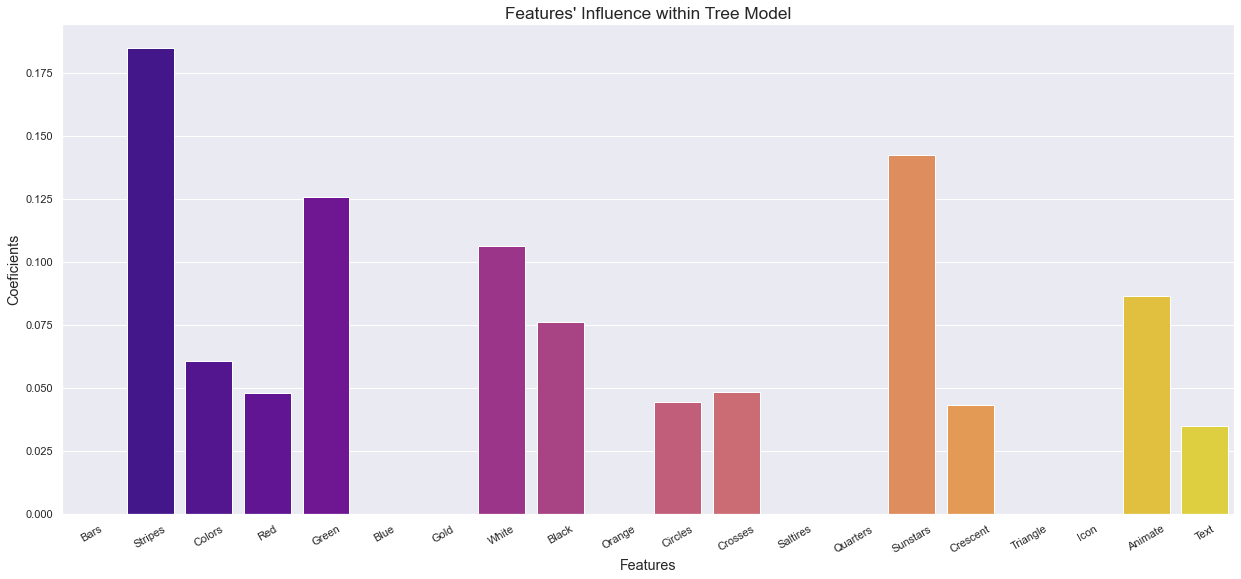

In [21]:
def visualise_barchart(feature_lst, values):
    # Prepare grid
    plt.figure(figsize = (21,9))
    
    # Draw barplot
    ax = sns.barplot(x = feature_lst, y = values, palette='plasma')

    # Add descriptions
    plt.title('Features\' Influence within Tree Model', fontsize='x-large')
    plt.xlabel('Features', fontsize='large')
    plt.ylabel('Coeficients', fontsize='large')
    ax.set_xticklabels(feature_lst, rotation=30)

    return plt.show()

visualise_barchart(
    tree_classifier1.feature_names_in_, 
    tree_classifier1.feature_importances_)

Result: many descriptive features of a flag played a part in prediction, but in general, values are not high, the maximum influence has the feature `Stripes` and it has a coefficient about `0.18`, which is low in general. 

Let's see what scores we'll get from  a model that predicts language. There are 10 types of values in language column, so random guessing would give us about 10% chance of correct answer. 

In [22]:
# Train and test classifier, get best model params
tree_classifier2, scores2, best_score2, best_depth2, best_leaf_nodes2 = best_tree(train_data2, train_labels2, test_data2, test_labels2)
print('Accuracy:', round(best_score2, 2) * 100, '%')
print('Depth:', best_depth2)
print('Maximum leaf nodes:', best_leaf_nodes2)

Accuracy: 43.0 %
Depth: 6
Maximum leaf nodes: 14


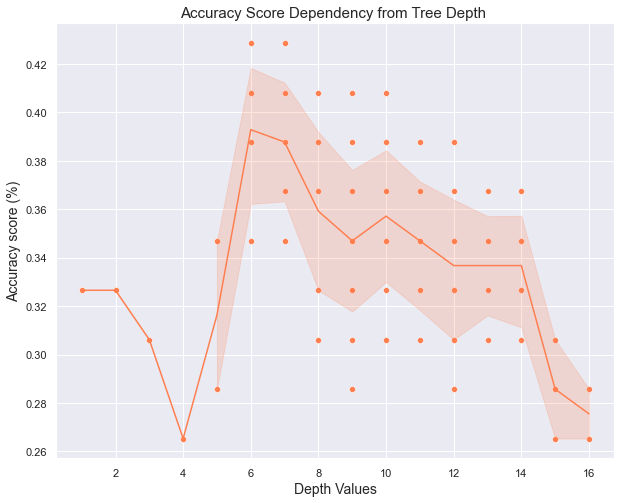

In [23]:
depth_change(np.array(scores2), color='coral')

In [24]:
print(classification_report(test_labels2, tree_classifier2.predict(test_data2), zero_division=1))

              precision    recall  f1-score   support

           1       0.67      0.83      0.74        12
           2       1.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       1.00      0.00      0.00         1
           5       1.00      0.00      0.00         3
           6       1.00      0.10      0.18        10
           8       0.40      0.67      0.50         3
          10       0.32      0.73      0.44        11

    accuracy                           0.43        49
   macro avg       0.67      0.29      0.23        49
weighted avg       0.69      0.43      0.35        49



Result: 
- "Recall" metric is `0` for values `2=Spanish`, `3=French`, `4=German`, `5=Slavic`, that means that almost half values are labeled not correctly. On the top, the `6=Other Indo-European` has recall value only `10%` and that is obviously too low. 
- On the other hand labels `1=English` and `10=Others` have the best recalls - `83%` and `73%` respectively, these labels are represented by the highest numbers of data points - 31 and 35 respectively. 

Now let's check feature importance within our current language classifier.

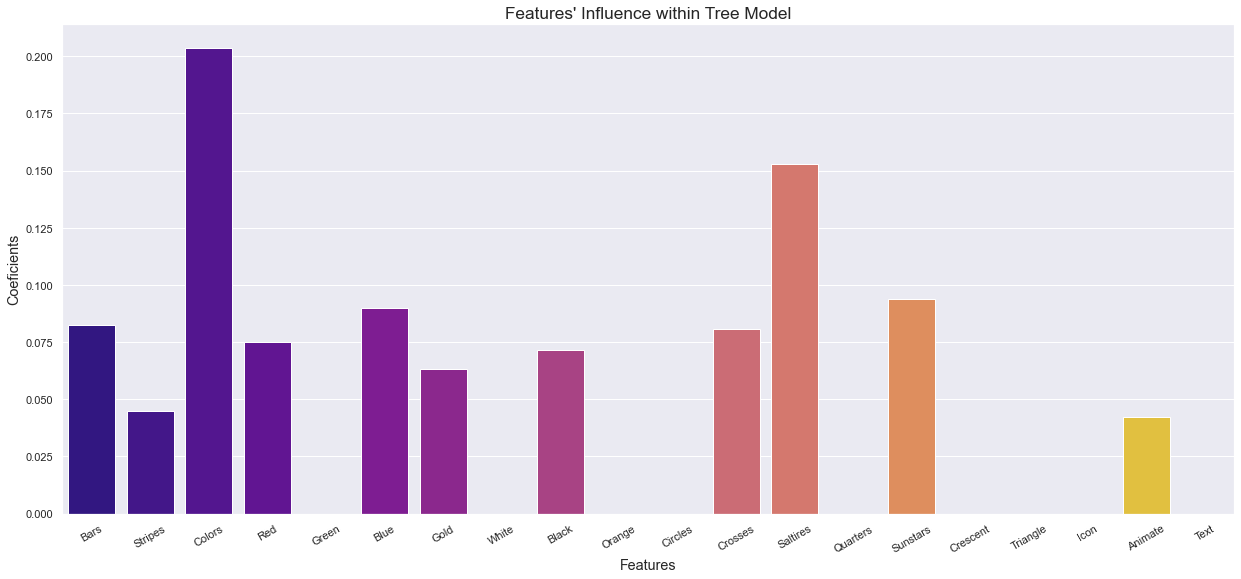

In [25]:
visualise_barchart(
    tree_classifier2.feature_names_in_, 
    tree_classifier2.feature_importances_)

Result: seems like the most important feature among descriptive ones for language determination is flag's `Colors` with the coefficient `0.2`. It is closely followed by `Saltires` with the coefficient of `1.5`. 
 

## Correlations based Feature Selection

Now let's find features that have some correlation with `Landmass` features. We'll take all that have at least `0.1` positive or negative value of correlation. 

In [26]:
flags.corr().head(1)

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
Landmass,1.0,-0.615759,0.013279,0.10594,0.4964,0.325073,-0.13929,-0.063375,-0.062856,0.0934,0.026226,-0.177366,-0.080465,-0.004134,-0.058243,0.020744,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743


In [27]:
data_corr_land = flags[['Zone', 'Population', 'Language',  'Religion', 'Bars', 'Blue', 'Crescent', 'Animate', 'Text']]

In [28]:
train_data3, test_data3, train_labels3, test_labels3 = train_test_split(data_corr_land, labels1, random_state = 8)

In [29]:
train_labels3.value_counts()

Landmass
4           45
5           28
1           24
3           21
2           15
6           12
dtype: int64

In [30]:
# Train and test classifier, get best model params
tree_classifier3, scores3, best_score3, best_depth3, best_leaf_nodes3 = best_tree(train_data3, train_labels3, test_data3, test_labels3)
print('Accuracy:', round(best_score3, 2) * 100, '%')
print('Depth:', best_depth3)
print('Maximum leaf nodes:', best_leaf_nodes3)

Accuracy: 86.0 %
Depth: 5
Maximum leaf nodes: 12


Let's check depth values change.

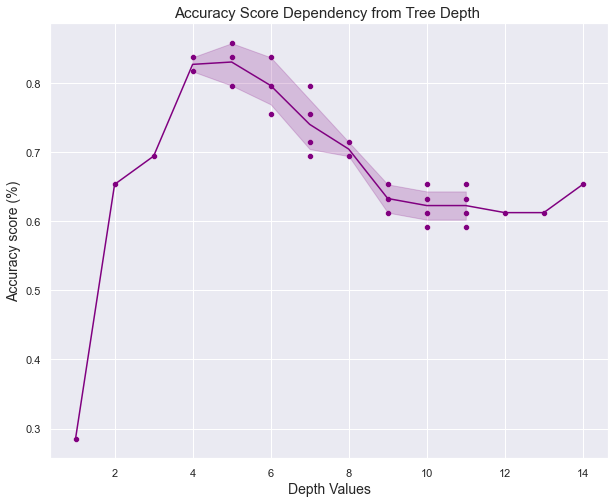

In [31]:
depth_change(np.array(scores3), color='purple')

Number of dots decreased, and the vertical range has narrowed dramatically, probably meaning that current features are better suited and require fewer efforts from model side in finding best splits.

In [32]:
print(classification_report(test_labels3, tree_classifier3.predict(test_data3), zero_division=1))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         2
           3       1.00      0.64      0.78        14
           4       0.86      0.86      0.86         7
           5       0.69      1.00      0.81        11
           6       1.00      0.88      0.93         8

    accuracy                           0.86        49
   macro avg       0.90      0.90      0.89        49
weighted avg       0.89      0.86      0.86        49



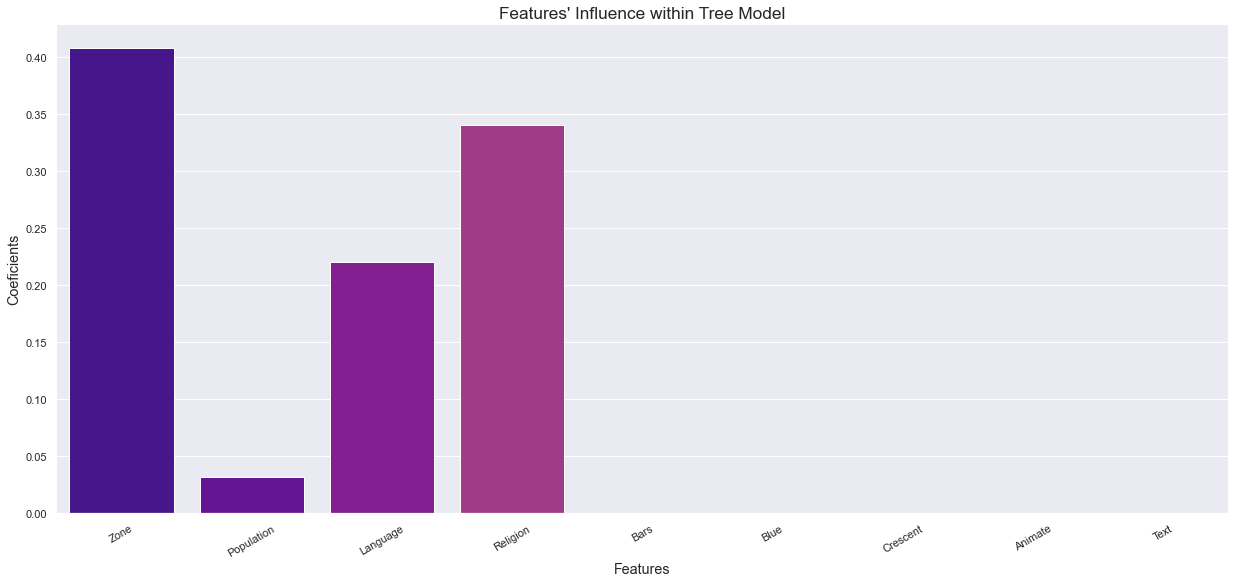

In [33]:
visualise_barchart(
    tree_classifier3.feature_names_in_, 
    tree_classifier3.feature_importances_)

Results: Even though the representation of different Landmass labels in the training data set is not equal, the new parameters with high correlation values, like `Zone`, `Religion` and `Language` help to determine continent pretty solidly on the contrast with strictly "flag descriptive" features. 

Now let's predict language using correlations for feature selection. We'll also take all features that have at least `0.1` positive or negative value of correlation. 

In [34]:
flags.corr()[4:5]

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
Language,0.4964,-0.618387,-0.027869,0.062804,1.0,0.422315,-0.049862,0.105409,-0.197883,-0.011048,0.006046,-0.262201,-0.189429,-0.046823,0.094465,-0.064407,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977


Seems like `Landmass` and `Religion` have similar positive correlation values, so let's remove feature with lower value - `Religion` - to improve final accuracy of the model. 

In [35]:
data_corr_lang = flags[['Landmass', 'Zone', 'Population', 'Stripes', 'Colors', 'Blue', 
    'Gold', 'Crosses', 'Saltires', 'Quarters', 'Sunstars', 'Crescent', 'Animate']]

In [36]:
train_data4, test_data4, train_labels4, test_labels4 = train_test_split(data_corr_lang, labels2, random_state = 3)

In [37]:
train_labels4.value_counts()

Language
1           36
10          33
6           18
8           16
2           15
3           12
4            4
5            4
7            4
9            3
dtype: int64

In [38]:
# Train and test classifier, get best model params
tree_classifier4, scores4, best_score4, best_depth4, best_leaf_nodes4 = best_tree(train_data4, train_labels4, test_data4, test_labels4)
print('Accuracy:', round(best_score4, 2) * 100, '%')
print('Depth:', best_depth4)
print('Maximum leaf nodes:', best_leaf_nodes4)

Accuracy: 65.0 %
Depth: 2
Maximum leaf nodes: 6


In [39]:
print(classification_report(test_labels4, tree_classifier4.predict(test_data4), zero_division=1))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.67      1.00      0.80         6
           3       1.00      0.00      0.00         5
           4       1.00      0.00      0.00         2
           6       0.64      0.58      0.61        12
           8       1.00      0.00      0.00         3
           9       1.00      0.00      0.00         1
          10       0.59      1.00      0.74        13

    accuracy                           0.65        49
   macro avg       0.84      0.43      0.38        49
weighted avg       0.74      0.65      0.57        49



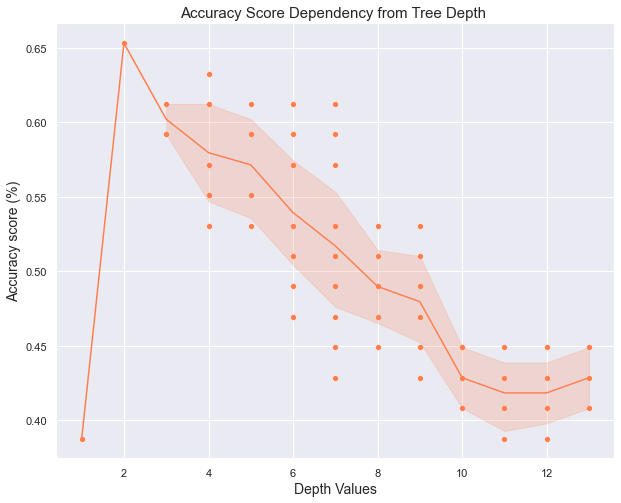

In [40]:
depth_change(np.array(scores4), color='coral')

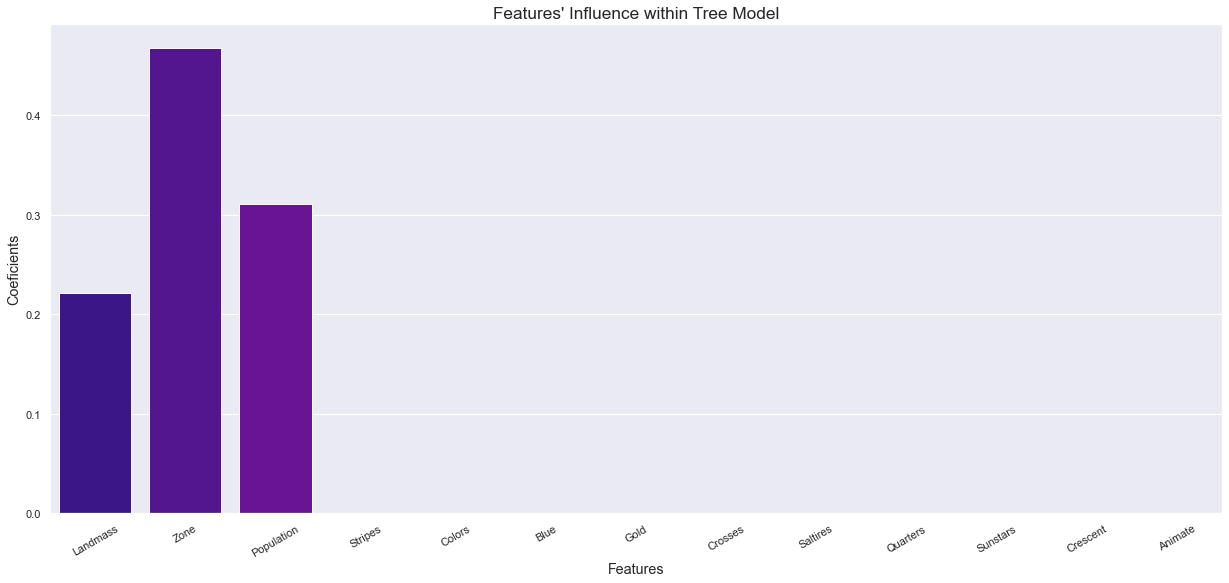

In [41]:
visualise_barchart(
    tree_classifier4.feature_names_in_, 
    tree_classifier4.feature_importances_)

Result: the score of the model that predicts language has risen from `43%` to `65%`, but percent of correct predictions (Recall) for `3=French`, `4=German`, `8=Arabic`, `9=Japanese/Turkish/Finnish/Magyar` is still `0`, what could be partly explained by data scarcity for these labels, and partly with something else that requires investigation. 

## Feature Selection within Model

We have a pretty big range of features, and we have a tree model that is capable of selecting those that supply the maximum information gain. Let's try to find which of the entire feature set are really matter for the model. 

In [42]:
# Select features for model
data_all_land = flags[['Zone', 'Area', 'Population', 'Language',
    'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
    'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
    'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate','Text']]
# Split data on training and testing sets
train_data5, test_data5, train_labels5, test_labels5 = train_test_split(data_all_land, labels1, random_state = 2)
# Train and test classifier, get best model params
tree_classifier5, scores5, best_score5, best_depth5, best_leaf_nodes5 = best_tree(train_data5, train_labels5, test_data5, test_labels5)
print('Accuracy:', round(best_score5, 2) * 100, '%')
print('Depth:', best_depth5)
print('Maximum leaf nodes:', best_leaf_nodes5)

Accuracy: 82.0 %
Depth: 5
Maximum leaf nodes: 11


In [43]:
train_labels5.value_counts()

Landmass
4           38
5           32
3           28
1           23
2           13
6           11
dtype: int64

In [44]:
print(classification_report(test_labels5, tree_classifier5.predict(test_data5), zero_division=1))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       0.50      0.75      0.60         4
           3       0.75      0.86      0.80         7
           4       0.91      0.71      0.80        14
           5       0.75      0.86      0.80         7
           6       1.00      0.78      0.88         9

    accuracy                           0.82        49
   macro avg       0.80      0.83      0.80        49
weighted avg       0.84      0.82      0.82        49



Result: Accuracy score is also high, but not all data splits on training and testing sets are that lucky, some result in accuracy around 70%. 

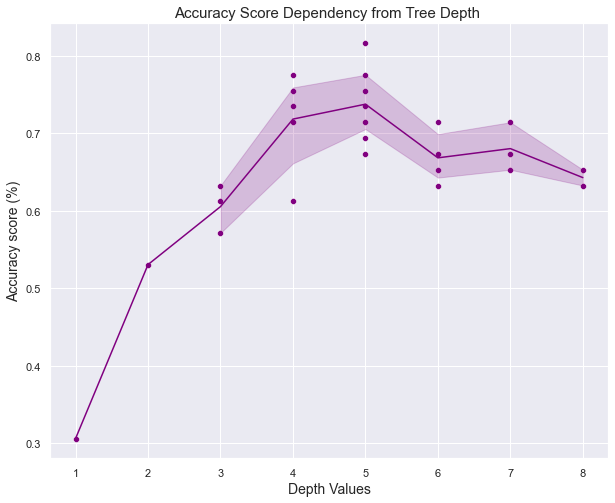

In [45]:
depth_change(np.array(scores5), color='purple')

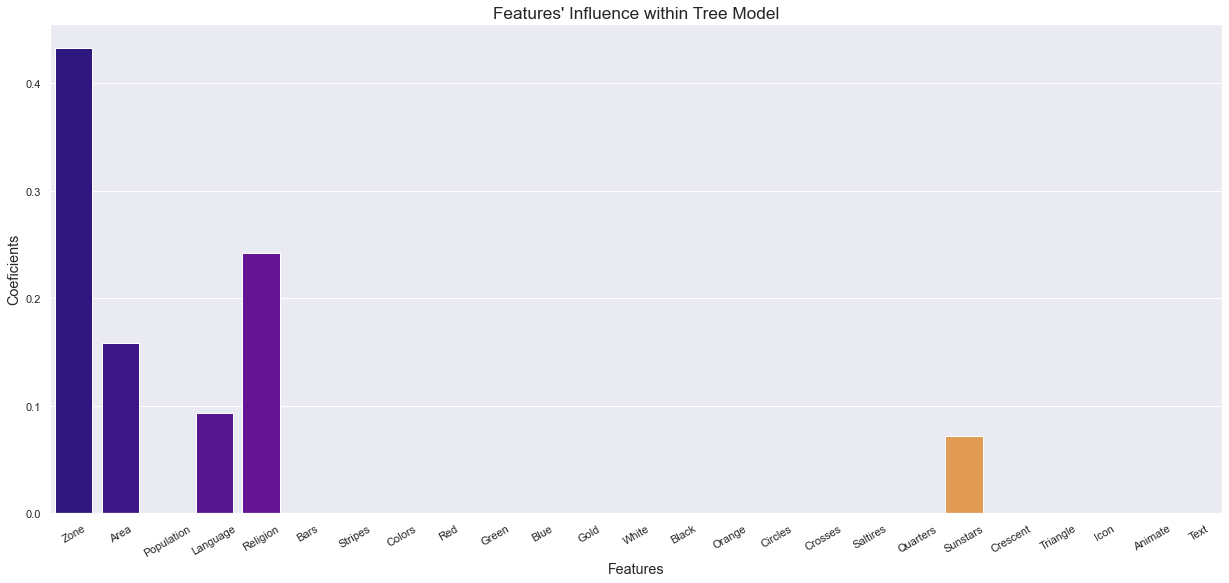

In [46]:
visualise_barchart(
    tree_classifier5.feature_names_in_, 
    tree_classifier5.feature_importances_)

Now let's creeate the last model that predicts languages and selects features by itself.

In [47]:
# Select features for model
data_all_lang = flags[['Landmass','Zone', 'Area', 'Population',
    'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
    'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
    'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
    'Text']]
# Split data on training and testing sets
train_data6, test_data6, train_labels6, test_labels6 = train_test_split(data_all_lang, labels2, random_state = 5)
# Train and test classifier, get best model params
tree_classifier6, scores6, best_score6, best_depth6, best_leaf_nodes6 = best_tree(train_data6, train_labels6, test_data6, test_labels6)
print('Accuracy:', round(best_score6, 2) * 100, '%')
print('Depth:', best_depth6)
print('Maximum leaf nodes:', best_leaf_nodes6)

Accuracy: 63.0 %
Depth: 4
Maximum leaf nodes: 7


In [48]:
train_labels6.value_counts()

Language
10          35
1           31
6           20
8           16
3           15
2           14
4            5
7            4
9            4
5            1
dtype: int64

In [49]:
print(classification_report(test_labels6, tree_classifier6.predict(test_data6), zero_division=1))

              precision    recall  f1-score   support

           1       0.58      0.92      0.71        12
           2       0.67      0.86      0.75         7
           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         1
           5       1.00      0.00      0.00         3
           6       0.43      0.30      0.35        10
           8       0.60      1.00      0.75         3
          10       0.89      0.73      0.80        11

    accuracy                           0.63        49
   macro avg       0.77      0.48      0.42        49
weighted avg       0.68      0.63      0.58        49



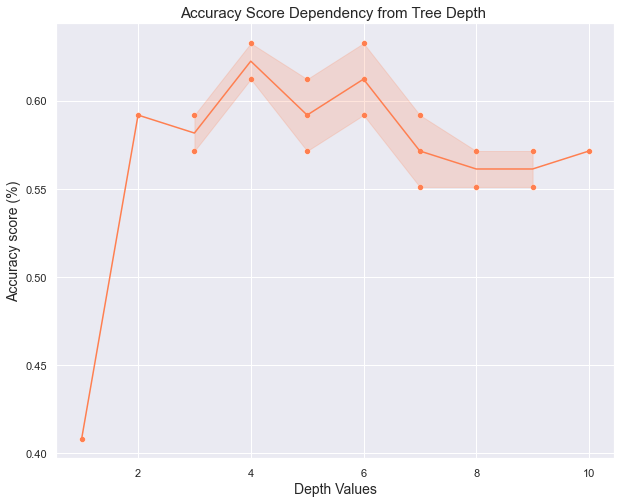

In [50]:
depth_change(np.array(scores6), color='coral')

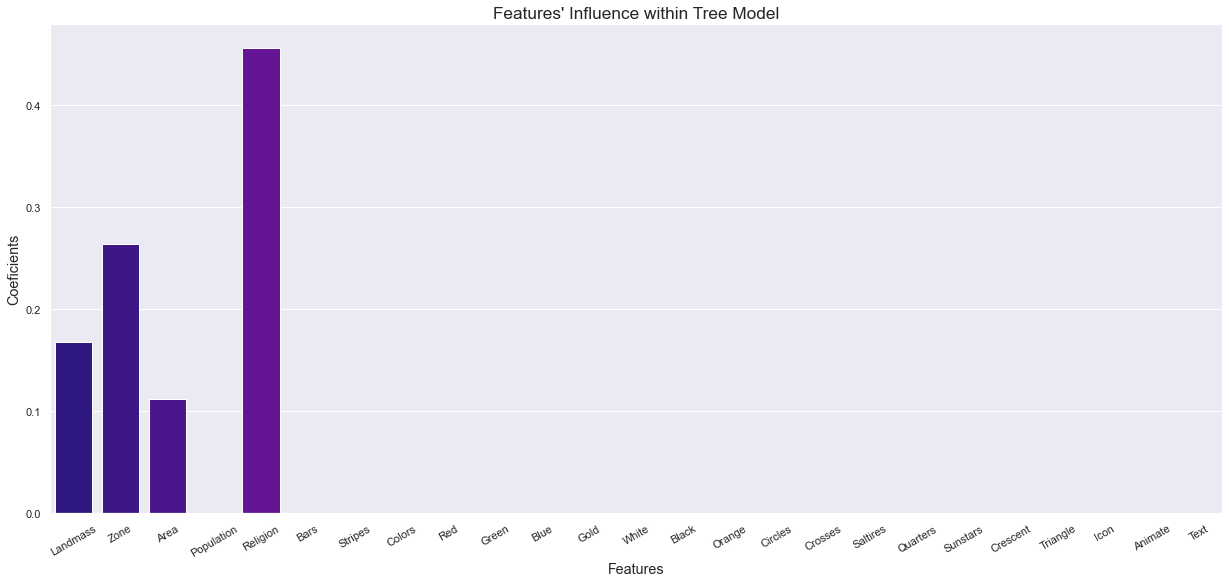

In [51]:
visualise_barchart(
    tree_classifier6.feature_names_in_, 
    tree_classifier6.feature_importances_)

Result: 

- First approach was based on features that describe a country's flag, what proved itself NOT equally effective for all continents or languages. Up to `40%` of labels had "Recall" `0`, meaning were predicted wrong. General accuracy for continent model was `47%` and for language - `43%`.
- Second approach to selection was based on feature correlations with language or continent. We have manually selected such features for the models. As a result, accuracy of continent model ncreased up to `86%` (no `0` "Recalls"), language - up to `65%` (with `40%` of `0` "Recalls").
- Third approach has left the feature selection process entirely to the models. Accuracy of continent model ncreased up to `82%` (no `0` "Recalls"), language - up to `63%` (with `30%` of `0` "Recalls").

 


## Simulation of Extrinsic Testing

Let’s use our models to predict continent and language. Considering this is a very old dataset, that contains USSR and Yugoslavia, but there are no such countries any more, so we'll take new independent states that were formed recently.

In [106]:
# Create dataset 
countries_data = [
    ['Kazakhstan',5,1,2725,19,10,2,0,0,2,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0],
    ['Georgia',5,1,70,4,10,1,0,0,2,1,0,0,0,1,0,0,0,5,0,4,0,0,0,0,0,0],
    ['Ukraine',3,1,603,41,5,1,0,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    ['Estonia',3,1,45,1,10,7,0,3,3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
    ['Namibia',4,2,825,3,10,1,0,3,5,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0]
]
# List columns
columns=[
      'Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
      'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
      'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
      'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate', 'Text', 
]
# Create dataframe
countries = pd.DataFrame(countries_data, columns=columns)
countries

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
0,Kazakhstan,5,1,2725,19,10,2,0,0,2,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,Georgia,5,1,70,4,10,1,0,0,2,1,0,0,0,1,0,0,0,5,0,4,0,0,0,0,0,0
2,Ukraine,3,1,603,41,5,1,0,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Estonia,3,1,45,1,10,7,0,3,3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,Namibia,4,2,825,3,10,1,0,3,5,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0


In [108]:
# Add columns with landmass predicted values
countries['Landmass_predby_tc1'] = tree_classifier1.predict(countries[tree_classifier1.feature_names_in_])
countries['Landmass_predby_tc3'] = tree_classifier3.predict(countries[tree_classifier3.feature_names_in_])
countries['Landmass_predby_tc5'] = tree_classifier5.predict(countries[tree_classifier5.feature_names_in_])
# Add columns with language predicted values
countries['Language_predby_tc2'] = tree_classifier2.predict(countries[tree_classifier2.feature_names_in_])
countries['Language_predby_tc4'] = tree_classifier4.predict(countries[tree_classifier4.feature_names_in_])
countries['Language_predby_tc6'] = tree_classifier6.predict(countries[tree_classifier6.feature_names_in_])
# Change columns order
countries = countries[[
    'Name', 'Landmass', 'Landmass_predby_tc1', 'Landmass_predby_tc3', 'Landmass_predby_tc5',
    'Language', 'Language_predby_tc2', 'Language_predby_tc4', 'Language_predby_tc6', 
    'Zone', 'Area', 'Population','Religion', 'Bars', 'Stripes', 'Colors', 'Red',
    'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
    'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate', 'Text'
]]
countries

,Name,Landmass,Landmass_predby_tc1,Landmass_predby_tc3,Landmass_predby_tc5,Language,Language_predby_tc2,Language_predby_tc4,Language_predby_tc6,Zone,Area,Population,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
0,Kazakhstan,5,5,5,4,10,1,10,8,1,2725,19,2,0,0,2,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,Georgia,5,3,6,3,10,8,10,1,1,70,4,1,0,0,2,1,0,0,0,1,0,0,0,5,0,4,0,0,0,0,0,0
2,Ukraine,3,1,3,3,5,10,6,6,1,603,41,1,0,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Estonia,3,1,5,5,10,10,6,6,1,45,1,7,0,3,3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,Namibia,4,4,6,2,10,10,10,1,2,825,3,1,0,3,5,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0


Continents: 
1. N.America;
2. S.America; 
3. Europe;
4. Africa;
5. Asia;
6. Oceania.

Language:
1. English; 
2. Spanish; 
3. French;
4. German;
5. Slavic;
6. Other Indo-European;
7. Chinese; 
8. Arabic; 
9. Japanese/Turkish/Finnish/Magyar; 
10. Others.

## Conclusion

We have created 6 tree models: 3 of them predict continent, other 3 language by different given features. Each time we selected features for these 6 models differently.

Intrinsic testing has shown:

- In general, second and third approaches increased accuracy scores from `47%` to `82-86%` for continent prediction and from `43%` to `65%` for language. 

- On depth vs accuracy graphs of all 4 models significantly decreased the number of different depth variations, what probably means that the features are better suited and require fewer efforts from model side to find best splits. 

- The percent of labels with "Recall" `0` was still high for language models `30-40%`, but continent predicting models became significantly more accurate, with only one case of `0` in "Recall". Though the number of features that models considered wasn't the same, the features that have high correlation values were crucial in both cases.

Extrinsic testing simulation has shown:

- On a selected pool of countries all models performed pretty poorly, sometimes those that used only descriptive features had even better results than those that used highly correlating or all features. 

Resulting scores of these models and real results are highly dependent on overall number of data points each label corresponds to - in our case those numbers were small - sometimes containing only 2-3 data points, which is not enough for any model to learn properly. That also mostly explains why some labels had `0` "Recall". This result suggest, that one would better use **Random Forest** technique to predict something within this dataset, because Forest trains on many variations of the same set, containing copies of data points. That allows model to split data in many ways to avoid overfitting and some biases.